In [ ]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

Saving covid_de.csv to covid_de (2).csv


In [ ]:
df = pd.read_csv('covid_de.csv') #https://www.kaggle.com/headsortails/covid19-tracking-germany 

In [ ]:
df.head()

,state,county,age_group,gender,date,cases,deaths,recovered
0,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-27,1,0,1
1,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-03-28,1,0,1
2,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-04-03,1,0,1
3,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-18,1,0,1
4,Baden-Wuerttemberg,LK Alb-Donau-Kreis,00-04,F,2020-10-22,1,0,1


In [ ]:
df.tail()

,state,county,age_group,gender,date,cases,deaths,recovered
376603,Thueringen,SK Weimar,80-99,M,2020-12-16,1,0,0
376604,Thueringen,SK Weimar,80-99,M,2020-12-17,2,0,0
376605,Thueringen,SK Weimar,80-99,M,2020-12-18,1,0,0
376606,Thueringen,SK Weimar,80-99,M,2020-12-19,3,0,0
376607,Thueringen,SK Weimar,80-99,M,2020-12-20,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376608 entries, 0 to 376607
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   state      376608 non-null  object
 1   county     376608 non-null  object
 2   age_group  374005 non-null  object
 3   gender     368898 non-null  object
 4   date       376608 non-null  object
 5   cases      376608 non-null  int64 
 6   deaths     376608 non-null  int64 
 7   recovered  376608 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 23.0+ MB


In [ ]:
df.shape

(376608, 8)

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
daily_cases = df.groupby(["date"]).agg({'recovered':'sum','deaths':'sum','cases':'sum'})

In [ ]:
daily_cases.head()

,recovered,deaths,cases
date,,,
2020-01-02,1,0,1
2020-01-12,1,0,1
2020-01-14,1,0,1
2020-01-18,1,0,1
2020-01-28,3,0,3


In [ ]:
daily_cases.tail()

,recovered,deaths,cases
date,,,
2020-12-16,780,113,30969
2020-12-17,555,80,31038
2020-12-18,308,70,27831
2020-12-19,130,29,19867
2020-12-20,31,2,8520


In [ ]:
fig = px.bar(x=daily_cases.index, y=daily_cases['cases']-daily_cases['deaths']-daily_cases['recovered'])
fig.update_layout(title='Active Cases',xaxis_title="Date",yaxis_title='N° Cases')
fig.show()

Growth Rate of Confirmed/Recovered and Death Cases

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_cases.index, y=daily_cases['cases'],name='Confirmed'))
fig.add_trace(go.Scatter(x=daily_cases.index, y=daily_cases['deaths'],name='Deaths'))
fig.add_trace(go.Scatter(x=daily_cases.index, y=daily_cases['recovered'],name='Cured'))
fig.update_layout(title='Growth Rate', xaxis_title="Date",yaxis_title='N° Cases')
fig.show()

In [ ]:
rates = make_subplots(rows=2, cols=1,subplot_titles=('Mortality Rate','Recovery Rate'))
rates.add_trace(go.Scatter(x=daily_cases.index, y=(daily_cases['deaths']/daily_cases['cases'])*100,name='Morality Rate'),row=1,col=1)
rates.add_trace(go.Scatter(x=daily_cases.index, y=(daily_cases['recovered']/daily_cases['cases'])*100,name='Recovery Rate'),row=2,col=1)
rates.update_xaxes(title ='Date', row=1,col=1)
rates.update_xaxes(title ='Date', row=1,col=2)
rates.update_yaxes(title='Morality Rate', row=1,col=1)
rates.update_yaxes(title='Recovery Rate', row=1,col=2)
rates.show()

7 Days Rolling Mean

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_cases.index, y=daily_cases['cases'].diff().rolling(window=7).mean(),name='Confirmed'))
fig.add_trace(go.Scatter(x=daily_cases.index, y=daily_cases['deaths'].diff().rolling(window=7).mean(),name='Death'))
fig.add_trace(go.Scatter(x=daily_cases.index, y=daily_cases['recovered'].diff().rolling(window=7).mean(),name='Recovered'))
fig.update_layout(title="7 days Rolling Mean",xaxis_title='Date',yaxis_title='N° Cases')
fig.show()

# **States Analysis**

In [ ]:
state_group = df.groupby(['state']).agg({'recovered':'sum','deaths':'sum','cases':'sum'})
state_group['Active Cases'] = state_group['cases'] - state_group['recovered'] - state_group['deaths']

In [ ]:
sns.barpot

,recovered,deaths,cases,Active Cases
state,,,,
Baden-Wuerttemberg,153760,3969,212179,54450
Bayern,218471,5692,289735,65572
Berlin,67026,1006,86879,18847
Brandenburg,24124,658,32375,7593
Bremen,10095,171,12597,2331


In [ ]:
top_8_cases = state_group.sort_values(['cases'],ascending=False).head(8)
top_8_recovered = state_group.sort_values(['recovered'],ascending=False).head(8)
top_8_deaths = state_group.sort_values(['deaths'],ascending=False).head(8)
top_8_active = state_group.sort_values(['Active Cases'],ascending=False).head(8)

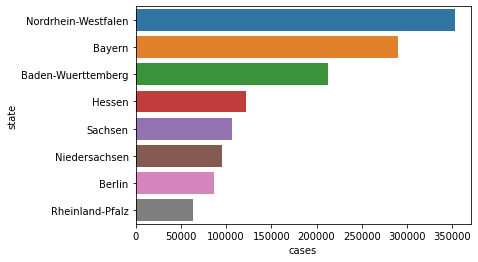

In [ ]:
sns.barplot(x=top_8_cases['cases'], y= top_8_cases.index)

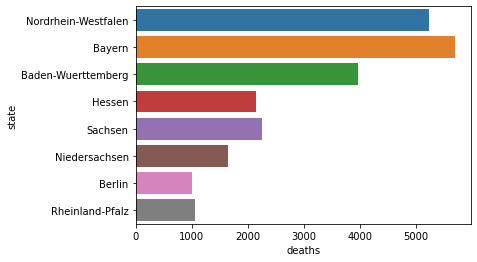

In [ ]:
sns.barplot(x=top_8_cases['deaths'], y= top_8_cases.index)

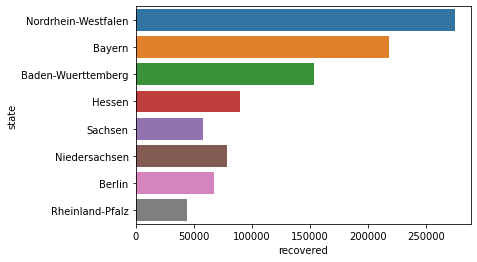

In [ ]:
sns.barplot(x=top_8_cases['recovered'], y= top_8_cases.index)

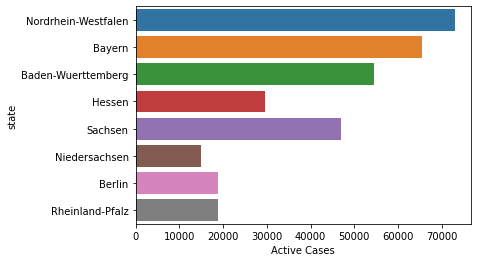

In [ ]:
sns.barplot(x=top_8_cases['Active Cases'], y= top_8_cases.index)